# Modelo 4 - XGBoost

XGBoost aplicado sobre los datos de entrenamiento. 

Se divide el dataset de entrenamiento en train y test para probar las métricas del modelo con etiquetas conocidas.

#### Paquetes



In [144]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

#### Funciones

In [145]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

## Datos tratamiento 1

In [196]:
%store -r newtrain_t1
newtrain_t1.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 249 columns]

#### Datos train y datos testing

In [197]:
# asignamos variable dependiente e independiente
X = newtrain_t1.iloc[:,1:] # features
y = newtrain_t1.iloc[:,0] # variable target

In [198]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape

(105000, 248)

In [199]:
# 105K obs en train, 45K en test
# 248 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 248)
(45000, 248)
(105000,)
(45000,)


### XGBoost

##### 1) Entrenamiento

In [200]:
# Training
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

AUC Score 0.9121503491547172


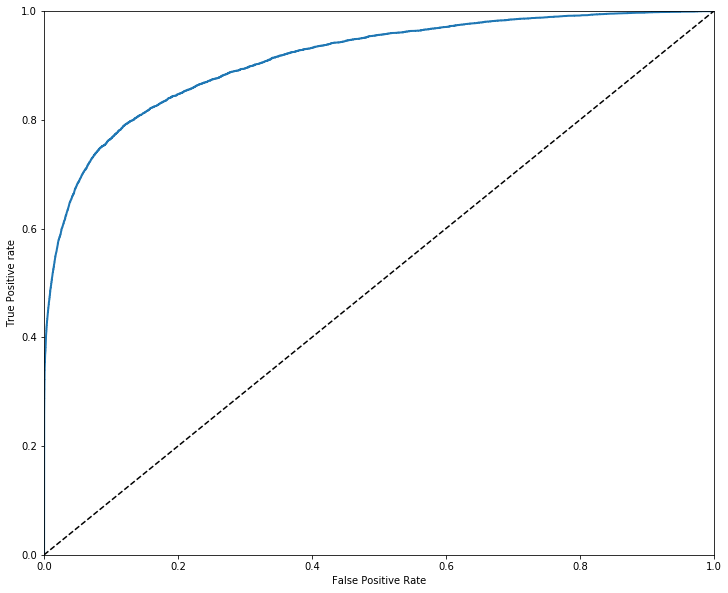

In [201]:
# Predicción sobre train
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

##### 2) Validación

AUC Score 0.8508478921891252


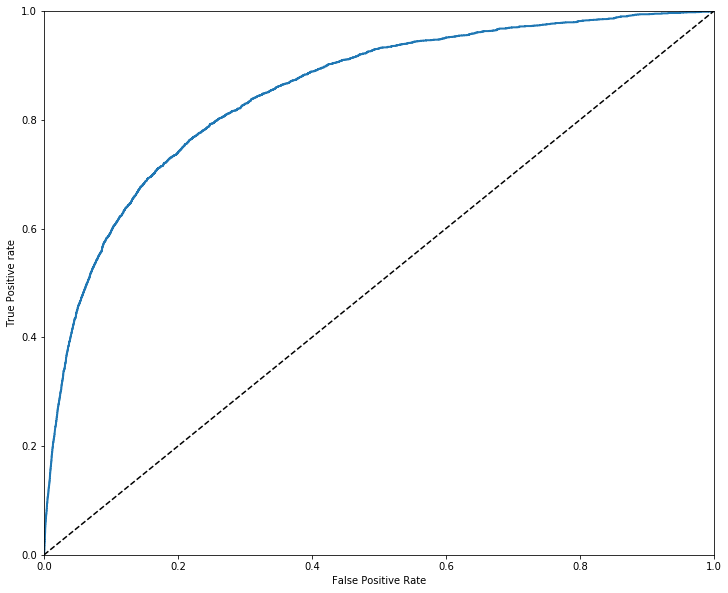

In [202]:
# Predicción sobre test
gbc_clf_proba = gbc_clf.predict_proba(X_test)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_test, gbc_clf_scores)))

In [203]:
# Matriz de confusión
y_pred_test=gbc_clf.predict(X_test)
cnf_matrix_GB = confusion_matrix(y_test, y_pred_test)
cnf_matrix_GB

array([[41476,   489],
       [ 2474,   561]], dtype=int64)

In [154]:
# Métricas
metricas_GB_t1 = classification_report(y_test, y_pred_test)
print(metricas_RF_t1)

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     41965
          1       0.53      0.18      0.27      3035

avg / total       0.92      0.93      0.92     45000



In [155]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-0.04688322876736328

![title](imagen/task.png)

## Datos tratamiento 2

In [156]:
%store -r newtrain_t2
newtrain_t2.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 216 columns]

#### Datos train y datos testing

In [157]:
# asignamos variable dependiente e independiente
X = newtrain_t2.iloc[:,1:] # features
y = newtrain_t2.iloc[:,0] # variable target

In [158]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape

(105000, 215)

In [159]:
# 105K obs en train, 45K en test
# 215 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 215)
(45000, 215)
(105000,)
(45000,)


### XGBoost

##### 1) Entrenamiento

In [160]:
# Training
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

AUC Score 0.912316056483762


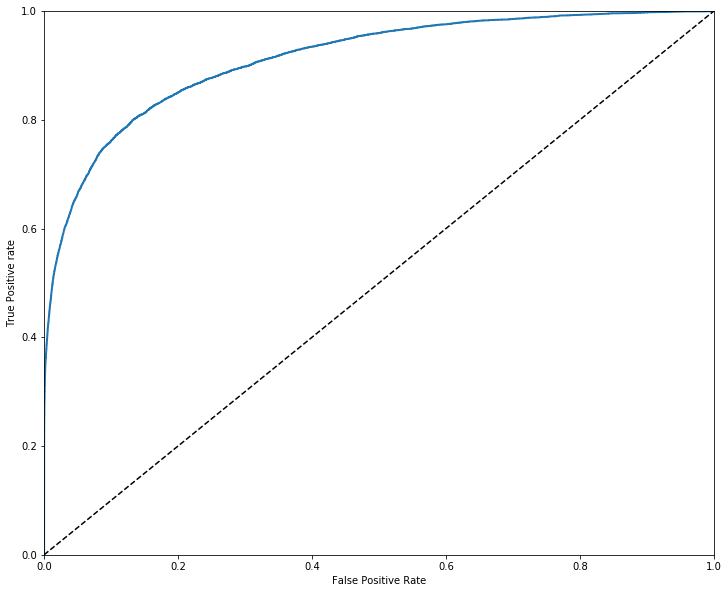

In [161]:
# Predicción sobre train
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

##### 2) Validación

AUC Score 0.8489976290354145


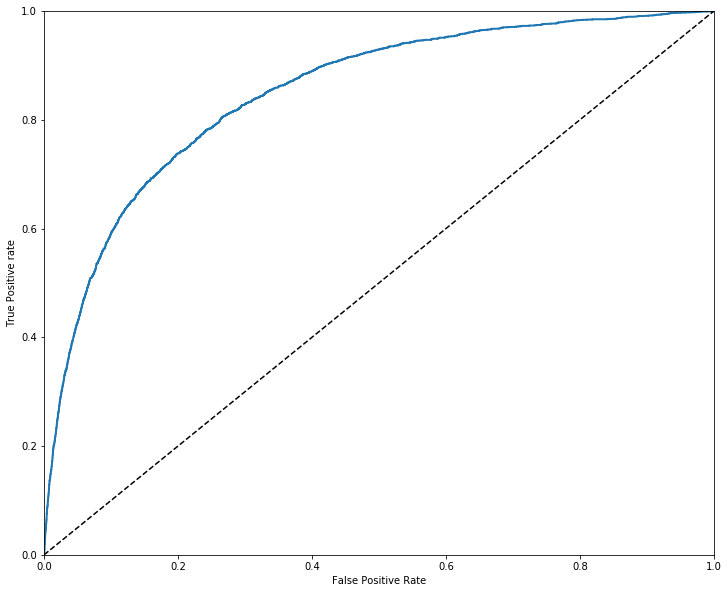

In [162]:
# Predicción sobre test
gbc_clf_proba = gbc_clf.predict_proba(X_test)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_test, gbc_clf_scores)))

In [163]:
# Matriz de confusión
y_pred_test=gbc_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[41499,   466],
       [ 2549,   486]], dtype=int64)

In [164]:
# Métricas
metricas_GB_t2 = classification_report(y_test, y_pred_test)
print(metricas_GB_t2)

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     41965
          1       0.51      0.16      0.24      3035

avg / total       0.91      0.93      0.92     45000



In [165]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-0.06525579977509288

![title](imagen/task.png)

## Datos tratamiento 3

In [166]:
%store -r newtrain_t3
newtrain_t3.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 197 columns]

#### Datos train y datos testing

In [167]:
# asignamos variable dependiente e independiente
X = newtrain_t3.iloc[:,1:] # features
y = newtrain_t3.iloc[:,0] # variable target

In [168]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape

(105000, 196)

In [169]:
# 105K obs en train, 45K en test
# 196 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 196)
(45000, 196)
(105000,)
(45000,)


### XGBoost

##### 1) Entrenamiento

In [170]:
# Training
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

AUC Score 0.9122634856969798


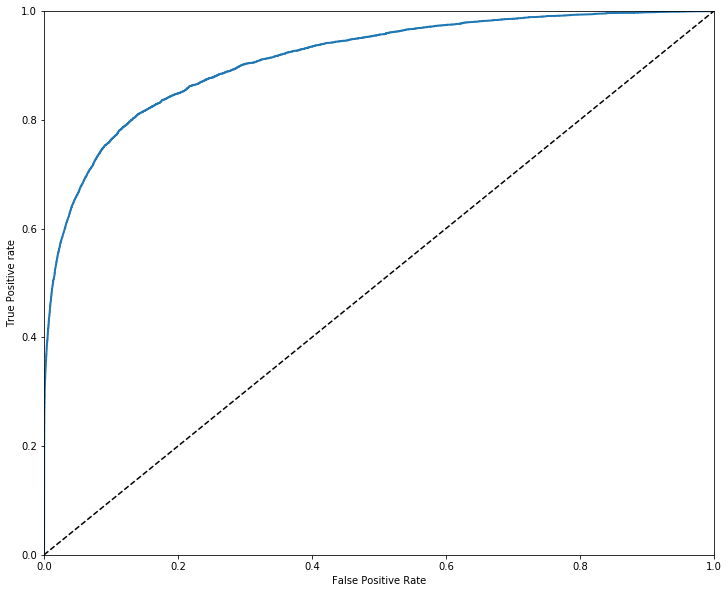

In [171]:
# Predicción sobre train
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

##### 2) Validación

AUC Score 0.8463284320836125


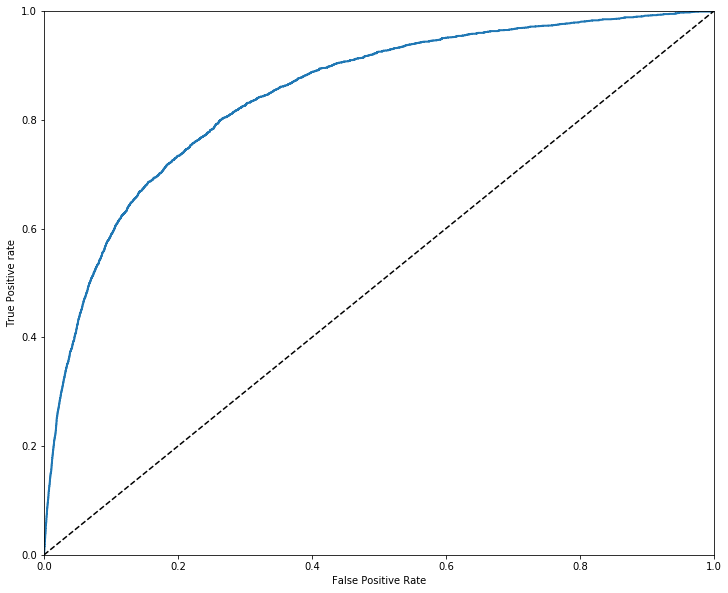

In [172]:
# Predicción sobre test
gbc_clf_proba = gbc_clf.predict_proba(X_test)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_test, gbc_clf_scores)))

In [173]:
# Matriz de confusión
y_pred_test=gbc_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[41501,   464],
       [ 2550,   485]], dtype=int64)

In [174]:
# Métricas
metricas_GB_t3 = classification_report(y_test, y_pred_test)
print(metricas_GB_t3)

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     41965
          1       0.51      0.16      0.24      3035

avg / total       0.91      0.93      0.92     45000



In [175]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-0.06490248110186725

![title](imagen/task.png)

## Datos tratamiento 4

In [176]:
%store -r newtrain_t4
newtrain_t4.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 206 columns]

#### Datos train y datos testing

In [177]:
# asignamos variable dependiente e independiente
X = newtrain_t4.iloc[:,1:] # features
y = newtrain_t4.iloc[:,0] # variable target

In [178]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape

(105000, 205)

In [179]:
# 105K obs en train, 45K en test
# 248 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 205)
(45000, 205)
(105000,)
(45000,)


### XGBoost

##### 1) Entrenamiento

In [180]:
# Training
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

AUC Score 0.9078768544924992


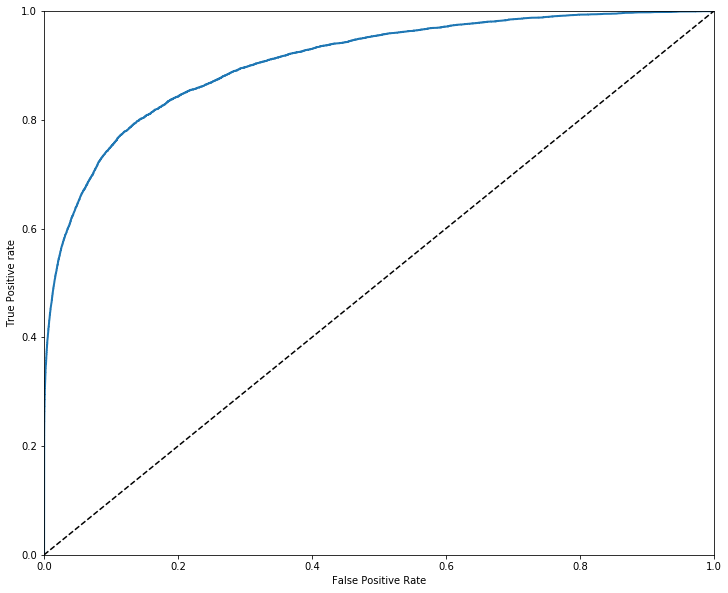

In [181]:
# Predicción sobre train
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

##### 2) Validación

AUC Score 0.846524347287916


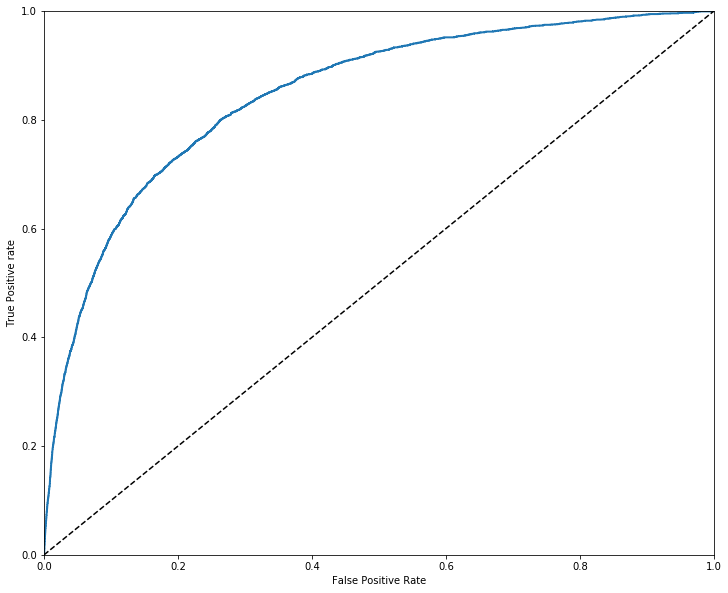

In [182]:
# Predicción sobre test
gbc_clf_proba = gbc_clf.predict_proba(X_test)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_test, gbc_clf_scores)))

In [183]:
# Matriz de confusión
y_pred_test=gbc_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[41527,   438],
       [ 2535,   500]], dtype=int64)

In [184]:
# Métricas
metricas_GB_t4 = classification_report(y_test, y_pred_test)
print(metricas_GB_t4)

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     41965
          1       0.53      0.16      0.25      3035

avg / total       0.91      0.93      0.92     45000



In [185]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-0.05041641549961895

![title](imagen/task.png)

<div class="alert alert-block alert-info">
<b>Conclusiones</b> 
</div>

In [186]:
#### Tratamiento 1
metricas_GB_t1 # métricas XGBoost con datos tratamiento 1

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.97     41965\n          1       0.53      0.18      0.27      3035\n\navg / total       0.92      0.93      0.92     45000\n'

In [187]:
%store metricas_GB_t1

Stored 'metricas_GB_t1' (str)


In [204]:
%store cnf_matrix_GB

Stored 'cnf_matrix_GB' (ndarray)


In [188]:
#### Tratamiento 2
metricas_GB_t2 # métricas XGBoost con datos tratamiento 2

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.96     41965\n          1       0.51      0.16      0.24      3035\n\navg / total       0.91      0.93      0.92     45000\n'

In [189]:
%store metricas_GB_t2

Stored 'metricas_GB_t2' (str)


In [190]:
#### Tratamiento 3
metricas_GB_t3  # métricas XGBoost con datos tratamiento 3

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.96     41965\n          1       0.51      0.16      0.24      3035\n\navg / total       0.91      0.93      0.92     45000\n'

In [191]:
%store metricas_GB_t3

Stored 'metricas_GB_t3' (str)


In [192]:
#### Tratamiento 4
metricas_GB_t4 # métricas XGBoost con datos tratamiento 4

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.97     41965\n          1       0.53      0.16      0.25      3035\n\navg / total       0.91      0.93      0.92     45000\n'

In [193]:
%store metricas_GB_t4

Stored 'metricas_GB_t4' (str)
